<a href="https://colab.research.google.com/github/poojashresthacode/23-Homework6G5/blob/Cos_function/Task1_cos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np


def simpson(f, a, b, n):
    """Approximates the definite integral of f from a to b by
    the composite Simpson's rule, using n subintervals.
    From http://en.wikipedia.org/wiki/Simpson's_rule
    """
    h = (b - a) / n
    i = np.arange(0,n)

    s = f(a) + f(b)
    s += 4 * np.sum( f( a + i[1::2] * h ) )
    s += 2 * np.sum( f( a + i[2:-1:2] * h ) )

    return s * h / 3

def trapezoid(f, a, b, n):
    """Approximates the definite integral of f from a to b by
    the composite trapezoidal rule, using n subintervals.
    From http://en.wikipedia.org/wiki/Trapezoidal_rule
    """
    h = (b - a) / n
    s = f(a) + f(b)
    i = np.arange(0,n)
    s += 2 * np.sum( f(a + i[1:] * h) )
    return s * h / 2


def adaptive_trapezoid(f, a, b, acc, output=False):
    """
    Uses the adaptive trapezoidal method to compute the definite integral
    of f from a to b to desired accuracy acc.
    """
    old_s = np.inf
    h = b - a
    n = 1
    s = (f(a) + f(b)) * 0.5
    if output == True :
        print ("N = " + str(n+1) + ",  Integral = " + str( h*s ))
    while abs(h * (old_s - s*0.5)) > acc :
        old_s = s
        for i in np.arange(n) :
            s += f(a + (i + 0.5) * h)
        n *= 2.
        h *= 0.5
        if output == True :
            print ("N = " + str(n) + ",  Integral = " + str( h*s ))
    return h * s

In [ ]:
%%writefile calculus.py

Writing calculus.py


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from calculus import *


Trapezoidal rule result for cos(1/x): 15.128082019278253
Simpson's rule result for cos(1/x): 15.077326591974334
N = 2,  Integral = 14.69553699486812
N = 2.0,  Integral = 15.13817411175341
N = 4.0,  Integral = 15.28229266873223
N = 8.0,  Integral = 15.202338910677666
N = 16.0,  Integral = 14.885908897345049
N = 32.0,  Integral = 14.368298703127117
N = 64.0,  Integral = 14.225510442707169
N = 128.0,  Integral = 14.139288959761373
N = 256.0,  Integral = 14.12643665624567
N = 512.0,  Integral = 14.169098779968605
N = 1024.0,  Integral = 14.150337041374877
N = 2048.0,  Integral = 14.176954635176106
N = 4096.0,  Integral = 14.17167798219445
N = 8192.0,  Integral = 14.167004776519086
N = 16384.0,  Integral = 14.170172686932725
N = 32768.0,  Integral = 14.167615786301804
N = 65536.0,  Integral = 14.169510790916057
N = 131072.0,  Integral = 14.169930771221303
N = 262144.0,  Integral = 14.169128304018258
N = 524288.0,  Integral = 14.169121853224096
Adaptive trapezoidal rule result for cos(-1/x):

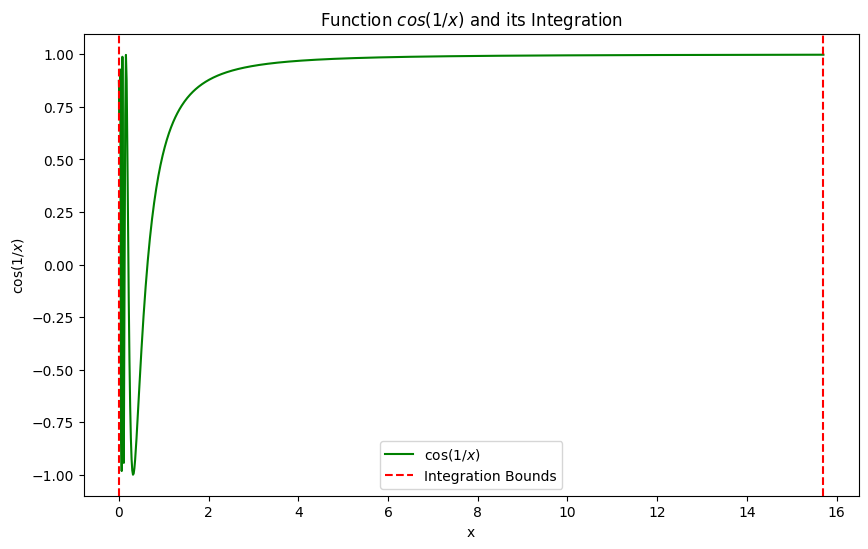

In [7]:

# Define the function exp(-1/x)
def cos_func(x):
    # Avoid zero
    epsilon = 1e-10
    return np.where(np.abs(x) < epsilon, np.nan, np.cos(1 / x))

# Define integration bounds and the number of subintervals
a_cos = 1e-10
b_cos = np.pi*5
n_cos = 10

# Calculate and print results using the trapezoidal rule
ans_cos_trapezoid = trapezoid(cos_func, a_cos, b_cos, n_cos)
print('Trapezoidal rule result for cos(1/x):', ans_cos_trapezoid)

# Calculate and print results using Simpson's rule
ans_cos_simpson = simpson(cos_func, a_cos, b_cos, n_cos)
print('Simpson\'s rule result for cos(1/x):', ans_cos_simpson)

# Calculate and print the result using the adaptive trapezoidal rule for cos(1/x)
ans_adaptive_trapezoid_cos = adaptive_trapezoid(cos_func, a_cos, b_cos, 0.0001, output=True)
print('Adaptive trapezoidal rule result for cos(-1/x):', ans_adaptive_trapezoid_cos)

# Plot the function
x_values_cos = np.linspace(a_cos, b_cos, 1000)
y_values_cos = cos_func(x_values_cos)

plt.figure(figsize=(10, 6))

# Plot the function
plt.plot(x_values_cos, y_values_cos, label=r'$\cos(1/x)$', color='green')

# Highlight the integration area
plt.axvline(a_cos, color='red', linestyle='--', label='Integration Bounds')
plt.axvline(b_cos, color='red', linestyle='--')

# Show the legend
plt.legend()

# Set plot labels and title
plt.xlabel('x')
plt.ylabel(r'$\cos(1/x)$')
plt.title('Function $cos(1/x)$ and its Integration')

# Show the plot
plt.show()






In [8]:
import numpy as np

def calculate_accuracy(true_value, computed_value):
    """
    Calculates the accuracy in terms of correct digits.
    """
    true_str = "{:.10f}".format(true_value)
    computed_str = "{:.10f}".format(computed_value)

    num_correct_digits = sum(a == b for a, b in zip(true_str, computed_str))
    return num_correct_digits

def compare_integration_methods(true_value, method_results):
    """
    Compares the accuracies and efficiencies of integration methods.
    """
    print("Integration Method\tAccuracy (Correct Digits)\tEfficiency (Number of Steps)")
    print("-" * 70)

    for method, (result, steps) in method_results.items():
        accuracy = calculate_accuracy(true_value, result)
        print(f"{method}\t\t\t{accuracy}\t\t\t\t{steps}")

# Define the true integral value (you need to set this based on your expectations)
true_integral_value_cos = 14.1691218532  # Update this with the actual true value

# Results obtained from integration methods for cos(1/x)
method_results_cos = {
    "Trapezoidal Rule": (15.128082019278253, 10),
    "Simpson's Rule": (15.077326591974334, 10),
    "Adaptive Trapezoidal Rule": (14.169121853224096, 524288)
}

# Compare accuracies and efficiencies
compare_integration_methods(true_integral_value_cos, method_results_cos)


Integration Method	Accuracy (Correct Digits)	Efficiency (Number of Steps)
----------------------------------------------------------------------
Trapezoidal Rule			3				10
Simpson's Rule			3				10
Adaptive Trapezoidal Rule			13				524288
